In [24]:
'''GENERATE DATA'''
N = 1000
import random as r,csv
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x0","x1","x2","y1","y2","class"])
    for i in range(N):
        if(r.random()>0.7):
            writer.writerow(["1",str(-1+r.random()*2),str(-1+r.random()*2),"1","0","1"])
        else:
            writer.writerow(["1",str(r.uniform(2,4)*pow(-1,r.randint(0,1))),str(r.uniform(2,4)*pow(-1,r.randint(0,1))),"0","1","2"])
                

    

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
print(df)

     x0        x1        x2  y1  y2  class
0     1 -2.769676  2.166004   0   1      2
1     1  2.281610  2.439797   0   1      2
2     1 -3.765164  2.877306   0   1      2
3     1 -0.981382  0.823398   1   0      1
4     1  0.502118 -0.309862   1   0      1
5     1  3.922894 -2.650758   0   1      2
6     1 -0.115388  0.346816   1   0      1
7     1  2.461393 -2.946067   0   1      2
8     1  3.653351 -3.335392   0   1      2
9     1  2.126340 -3.701596   0   1      2
10    1  2.508187 -3.799857   0   1      2
11    1 -2.385408  2.819347   0   1      2
12    1  3.943031 -3.830788   0   1      2
13    1 -2.377433 -2.799982   0   1      2
14    1 -3.665128 -3.571238   0   1      2
15    1  3.921662 -3.885011   0   1      2
16    1 -3.171397 -3.499764   0   1      2
17    1 -3.083567 -2.275326   0   1      2
18    1  2.221124 -2.056843   0   1      2
19    1  0.046265 -0.993533   1   0      1
20    1  2.946105  2.695123   0   1      2
21    1  3.402479  2.056643   0   1      2
22    1  2.

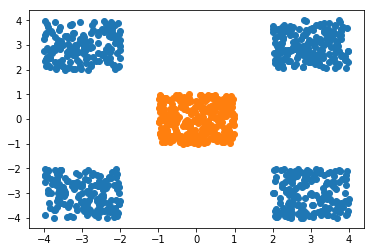

In [26]:
groups = df.groupby('y1')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x1, group.x2, marker='o', linestyle='')
plt.show()

In [27]:
N = len(df)
h = 3
C = 2
d = 2

In [28]:
import numpy as np

u1 = np.random.rand(N,h+1)
v1 = np.random.rand(N,h+1)
u2 = np.random.rand(N,2)
v2 = np.random.rand(N,2)

w1 = np.random.rand(h+1,d+1)
w2 = np.random.rand(2,h+1)


print(w1)
print()
print(w2)
print()
X = df[['x0','x1','x2']].values
y = df[['y1','y2','class']].values

trainset = int(0.7*N)

print(X)
print(y)

[[0.53218496 0.68268963 0.39778748]
 [0.76216391 0.1549321  0.78528256]
 [0.86548568 0.56000794 0.75416895]
 [0.85617752 0.58767591 0.00450191]]

[[0.02084015 0.46755918 0.12205828 0.48937093]
 [0.03718173 0.7833155  0.39973046 0.36822956]]

[[ 1.         -2.76967602  2.16600389]
 [ 1.          2.28161001  2.43979716]
 [ 1.         -3.76516399  2.87730618]
 ...
 [ 1.         -3.94662602  3.46788894]
 [ 1.         -3.57614528  3.71848808]
 [ 1.          0.18036669 -0.57327564]]
[[0 1 2]
 [0 1 2]
 [0 1 2]
 ...
 [0 1 2]
 [0 1 2]
 [1 0 1]]


In [29]:
import math
def phi(x):
    return 1/(1.0+math.exp(-x))

def dphi(x):
    return phi(x)*(1-phi(x))

def calcU1nj(n,j):
    s = 0
    for i in range(d+1):
        s += w1[j][i]*X[n][i]
    return s

def calcU2nk(n,k):
    s = 0
    for j in range(h+1):
        s += w2[k][j]*v1[n][j]
    return s

In [31]:
# Algorithm
epoch = 100
eta = 0.1
errors = []
for e in range(epoch):
    error = 0
    for n in range(trainset):
        for j in range(1,h+1):
            u1[n][j] = calcU1nj(n,j)
            v1[n][j] = phi(u1[n][j])
        err = 0
        for k in range(2):
            u2[n][k] = calcU2nk(n,k)
            v2[n][k] = phi(u2[n][k])
            err += (1/2)*((v2[n][k] - y[n][k])**2)
        
        error += err
        # Backprop
        for k in range(2):
            for j in range(h+1):
                w2[k][j] += eta*(y[n][k]-v2[n][k])*dphi(u2[n][k])*v1[n][j]
        for i in range(d+1):
            for j in range(1,h+1):
                w1[j][i] += eta*dphi(u1[n][j])*X[n][i]*sum([(y[n][k] - v2[n][k])*dphi(u2[n][k])*w2[k][j] for k in range(2)])
    print(e,error/700)
    errors.append(error/700)


0 0.0008786669626296004
1 0.0008682211334899581
2 0.000858014601020841
3 0.000848039335009967
4 0.0008382876579003032
5 0.0008287522257402289
6 0.0008194260103507145
7 0.0008103022826199941
8 0.0008013745968436802
9 0.000792636776035009
10 0.0007840828981360108
11 0.000775707283065991
12 0.0007675044805487388
13 0.0007594692586645814
14 0.0007515965930775097
15 0.0007438816568915669
16 0.0007363198110941178
17 0.0007289065955468943
18 0.0007216377204886055
19 0.0007145090585156788
20 0.0007075166370100915
21 0.0007006566309855596
22 0.0006939253563254727
23 0.0006873192633877776
24 0.0006808349309539115
25 0.0006744690605004283
26 0.000668218470773447
27 0.0006620800926474718
28 0.0006560509642514141
29 0.0006501282263457741
30 0.0006443091179360316
31 0.0006385909721083957
32 0.0006329712120748065
33 0.0006274473474151512
34 0.0006220169705052788
35 0.0006166777531202393
36 0.0006114274432028328
37 0.0006062638617881753
38 0.0006011849000755683
39 0.0005961885166395604
40 0.0005912727

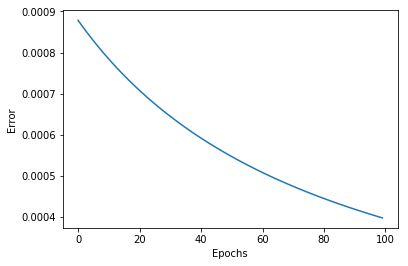

In [32]:
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(len(errors)),errors)

Accuracy :  1.0


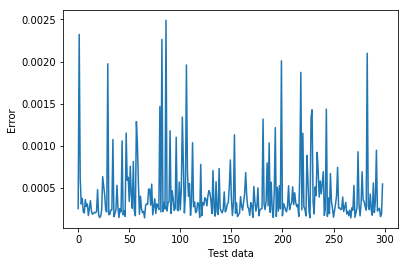

In [33]:
# testing
testerrors = []
correct = 0
for n in range(trainset+1,N):
    for j in range(1,h+1):
        u1[n][j] = calcU1nj(n,j)
        v1[n][j] = phi(u1[n][j])
    error = 0
    for k in range(2):
        u2[n][k] = calcU2nk(n,k)
        v2[n][k] = phi(u2[n][k])
        error += (v2[n][k] - y[n][k])**2
    c = np.argmax(v2[n])+1
    if(c==y[n][2]):
        correct+=1
    testerrors.append(error/2)
print("Accuracy : ",correct/(N-1-trainset))

plt.xlabel('Test data')
plt.ylabel('Error')
plt.plot(range(len(testerrors)),testerrors)